<a href="https://colab.research.google.com/github/FW0912/ResearchHeartDiseasePrediction/blob/main/Research_Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coding of Models used in Research Paper 'Cardiovascular Disease Prediction Dataset Machine Learning Analysis'.


---



Libraries used:
- numpy
- pandas
- ucimlrepo
- sklearn
- imblearn

Datasets used:
- UCIML Repo Heart Disease Dataset (Cleveland)
- UCIML Repo Statlog Heart Disease Dataset
- Framingham Heart Disease Dataset

Models used:
- Decision Tree (DT)
- Random Forest (RF)
- Support Vector Machine (SVM)
- K-Nearest Neighbor (KNN)
- Logistic Regression (LR)



---



In [1]:
# Install library for fetching dataset
!pip install ucimlrepo

In [319]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
from collections import Counter

In [189]:
# Function for parameter tuning
def tuneParameters(model, parameters, xTrain, yTrain):
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
  grid = GridSearchCV(model, parameters, cv=cv, scoring='accuracy')
  grid.fit(xTrain, yTrain)
  return grid.best_estimator_, grid.best_params_

In [4]:
# KNN-Imputer
imputer = KNNImputer()

In [5]:
# StandardScaler
scaler = StandardScaler()

In [176]:
# Under/Oversampling
underSampler = RandomUnderSampler(sampling_strategy=0.85, random_state=0)
overSampler = SMOTE(random_state=0)

In [125]:
# Decision Tree
DTmodel = DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [126]:
# DT parameter range for tuning
DTparameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [1, 2, 3, 4, 5],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5],
    'max_leaf_nodes' : [2, 3, 4, 5]
}

In [9]:
# Random Forest
RFmodel = RandomForestClassifier(class_weight='balanced', random_state=0)

In [10]:
# RF parameter range for tuning
RFparameters = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [True, False]
}

In [152]:
SVMmodel = SVC(class_weight='balanced', random_state=0)

In [128]:
# SVM parameter range for tuning
SVMparameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001]
}

In [13]:
# K-Nearest Neighbor
KNNmodel = KNeighborsClassifier()

In [14]:
# KNN parameter range for tuning
KNNparameters = {
    'n_neighbors': np.arange(2, 30, 1),
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 30, 50, 70, 100]
}

In [15]:
# Logistic Regression
LRmodel = LogisticRegression(class_weight='balanced', random_state=0)

In [16]:
# LR parameter range for tuning
LRparameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
}

Start of Coding for UCIML Repo Heart Disease Dataset

---



In [311]:
# Fetch Heart Disease dataset from UCI
heart_disease = fetch_ucirepo(id=45)
X_Cdataset = heart_disease.data.features
Y_Cdataset = heart_disease.data.targets

# Replace target (num) values 2, 3, 4 as 1 (model only predicts 0 and 1,
# 0 : No heart disease predicted
# 1 : Heart disease predicted
#)
Y_Cdataset.replace({2 : 1, 3 : 1, 4 : 1}, inplace=True)
df_Cdataset = X_Cdataset.join(Y_Cdataset)

<ipython-input-311-417488aadf46>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_Cdataset.replace({2 : 1, 3 : 1, 4 : 1}, inplace=True)


Data Cleaning and Preprocessing for UCIML Repo Heart Disease Dataset

---



In [316]:
df_Cdataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# Check for null values
print(df_Cdataset.isna().sum().sum())

6


In [291]:
# Split into x and y
X_Cdataset = df_Cdataset.drop('num', axis=1)
Y_Cdataset = df_Cdataset['num']

In [292]:
# Split into train and test
xTrain_Cdataset, xTest_Cdataset, yTrain_Cdataset, yTest_Cdataset = train_test_split(X_Cdataset, Y_Cdataset, test_size=0.2, random_state=0, stratify=Y_Cdataset)

In [293]:
# Standardization
xTrain_Cdataset[:] = scaler.fit_transform(xTrain_Cdataset)
xTest_Cdataset[:] = scaler.transform(xTest_Cdataset)

In [294]:
# KNN-imputation
train_Cdataset = xTrain_Cdataset.join(yTrain_Cdataset)
test_Cdataset = xTest_Cdataset.join(yTest_Cdataset)

train_Cdataset[:] = imputer.fit_transform(train_Cdataset)
test_Cdataset[:] = imputer.transform(test_Cdataset)

xTrain_Cdataset = train_Cdataset.drop('num', axis=1)
yTrain_Cdataset = train_Cdataset['num']
xTest_Cdataset = test_Cdataset.drop('num', axis=1)
yTest_Cdataset = test_Cdataset['num']

In [295]:
# Undersampling and Oversampling
xTrain_Cdataset, yTrain_Cdataset = underSampler.fit_resample(xTrain_Cdataset, yTrain_Cdataset)
xTrain_Cdataset, yTrain_Cdataset = overSampler.fit_resample(xTrain_Cdataset, yTrain_Cdataset)

Decision Tree (DT) Model for UCIML Repo Heart Disease Dataset

---



In [159]:
# DT parameter tuning
optimizedDT_Cdataset, optimizedDTparameters_Cdataset = tuneParameters(DTmodel, DTparameters, xTrain_Cdataset, yTrain_Cdataset)
print(optimizedDTparameters_Cdataset)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [160]:
# Get accuracy of optimized DT
predDT_Cdataset = optimizedDT_Cdataset.predict(xTest_Cdataset)
accDT_Cdataset = accuracy_score(np.ravel(yTest_Cdataset), np.ravel(predDT_Cdataset))
print(accDT_Cdataset)

0.8360655737704918


In [161]:
# Get precision of optimized DT
precDT_Cdataset = precision_score(np.ravel(yTest_Cdataset), np.ravel(predDT_Cdataset))
print(precDT_Cdataset)

0.9090909090909091


In [162]:
# Get recall of optimized DT
recallDT_Cdataset = recall_score(np.ravel(yTest_Cdataset), np.ravel(predDT_Cdataset))
print(recallDT_Cdataset)

0.7142857142857143


In [163]:
# Get f1-score of optimized DT
f1DT_Cdataset = f1_score(np.ravel(yTest_Cdataset), np.ravel(predDT_Cdataset))
print(f1DT_Cdataset)

0.8


Random Forest (RF) Model for UCIML Repo Heart Disease Dataset

---



In [28]:
# RF parameter tuning
optimizedRF_Cdataset, optimizedRFparameters_Cdataset = tuneParameters(RFmodel, RFparameters, xTrain_Cdataset, yTrain_Cdataset)
print(optimizedRFparameters_Cdataset)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [29]:
# Get accuracy of optimized RF
predRF_Cdataset = optimizedRF_Cdataset.predict(xTest_Cdataset)
accRF_Cdataset = accuracy_score(np.ravel(yTest_Cdataset), np.ravel(predRF_Cdataset))
print(accRF_Cdataset)

0.8688524590163934


In [30]:
# Get precision of optimized RF
precRF_Cdataset = precision_score(np.ravel(yTest_Cdataset), np.ravel(predRF_Cdataset))
print(precRF_Cdataset)

0.8846153846153846


In [31]:
# Get recall of optimized RF
recallRF_Cdataset = recall_score(np.ravel(yTest_Cdataset), np.ravel(predRF_Cdataset))
print(recallRF_Cdataset)

0.8214285714285714


In [32]:
# Get f1-score of optimized RF
f1RF_Cdataset = f1_score(np.ravel(yTest_Cdataset), np.ravel(predRF_Cdataset))
print(f1RF_Cdataset)

0.8518518518518519


Support Vector Machine (SVM) Model for UCIML Repo Heart Disease Dataset


---





In [296]:
# SVM hyperparameter tuning
optimizedSVM_Cdataset, optimizedSVMparameters_Cdataset = tuneParameters(SVMmodel, SVMparameters, xTrain_Cdataset, yTrain_Cdataset)
print(optimizedSVMparameters_Cdataset)

{'C': 10, 'gamma': 0.001}


In [297]:
# Get accuracy of optimized SVM
predSVM_Cdataset = optimizedSVM_Cdataset.predict(xTest_Cdataset)
accSVM_Cdataset = accuracy_score(np.ravel(yTest_Cdataset), np.ravel(predSVM_Cdataset))
print(accSVM_Cdataset)

0.9016393442622951


In [298]:
# Get precision of optimized SVM
precSVM_Cdataset = precision_score(np.ravel(yTest_Cdataset), np.ravel(predSVM_Cdataset))
print(precSVM_Cdataset)

0.8928571428571429


In [299]:
# Get recall of optimized SVM
recallSVM_Cdataset = recall_score(np.ravel(yTest_Cdataset), np.ravel(predSVM_Cdataset))
print(recallSVM_Cdataset)

0.8928571428571429


In [300]:
# Get f1-score of optimized SVM
f1SVM_Cdataset = f1_score(np.ravel(yTest_Cdataset), np.ravel(predSVM_Cdataset))
print(f1SVM_Cdataset)

0.8928571428571429


K-Nearest Neighbor (KNN) Model for UCIML Repo Heart Disease Dataset

---



In [38]:
# KNN hyperparameter tuning
optimizedKNN_Cdataset, optimizedKNNparameters_Cdataset = tuneParameters(KNNmodel, KNNparameters, xTrain_Cdataset, yTrain_Cdataset)
print(optimizedKNNparameters_Cdataset)

{'leaf_size': 10, 'n_neighbors': 17, 'weights': 'distance'}


In [39]:
# Get accuracy of optimized KNN
predKNN_Cdataset = optimizedKNN_Cdataset.predict(xTest_Cdataset)
accKNN_Cdataset = accuracy_score(np.ravel(yTest_Cdataset), np.ravel(predKNN_Cdataset))
print(accKNN_Cdataset)

0.8360655737704918


In [40]:
# Get precision of optimized KNN
precKNN_Cdataset = precision_score(np.ravel(yTest_Cdataset), np.ravel(predKNN_Cdataset))
print(precKNN_Cdataset)

0.78125


In [41]:
# Get recall of optimized KNN
recallKNN_Cdataset = recall_score(np.ravel(yTest_Cdataset), np.ravel(predKNN_Cdataset))
print(recallKNN_Cdataset)

0.8928571428571429


In [42]:
# Get f1-score of optimized KNN
f1KNN_Cdataset = f1_score(np.ravel(yTest_Cdataset), np.ravel(predKNN_Cdataset))
print(f1KNN_Cdataset)

0.8333333333333334


Logistic Regression (LR) Model for UCIML Repo Heart Disease Dataset

---



In [43]:
# LR hyperparameter tuning
optimizedLR_Cdataset, optimizedLRparameters_Cdataset = tuneParameters(LRmodel, LRparameters, xTrain_Cdataset, yTrain_Cdataset)
print(optimizedLRparameters_Cdataset)

{'C': 1, 'solver': 'lbfgs'}


In [44]:
# Get accuracy of optimized LR
predLR_Cdataset = optimizedLR_Cdataset.predict(xTest_Cdataset)
accLR_Cdataset = accuracy_score(np.ravel(yTest_Cdataset), np.ravel(predLR_Cdataset))
print(accLR_Cdataset)

0.8360655737704918


In [45]:
# Get precision of optimized LR
precLR_Cdataset = precision_score(np.ravel(yTest_Cdataset), np.ravel(predLR_Cdataset))
print(precLR_Cdataset)

0.8214285714285714


In [46]:
# Get recall of optimized LR
recallLR_Cdataset = recall_score(np.ravel(yTest_Cdataset), np.ravel(predLR_Cdataset))
print(recallLR_Cdataset)

0.8214285714285714


In [47]:
# Get f1-score of optimized LR
f1LR_Cdataset = f1_score(np.ravel(yTest_Cdataset), np.ravel(predLR_Cdataset))
print(f1LR_Cdataset)

0.8214285714285714


Start of Coding for UCIML Repo Stalog Heart Disease Dataset

---



In [314]:
# Fetch Statlog dataset fron UCI
statlog_heart = fetch_ucirepo(id=145)
X_Sdataset = statlog_heart.data.features
Y_Sdataset = statlog_heart.data.targets

df_Sdataset = X_Sdataset.join(Y_Sdataset)

Data Cleaning and Preprocessing for UCIML Repo Stalog Heart Disease Dataset

---



In [315]:
df_Sdataset.describe()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,heart-disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
# Check for null values
print(df_Sdataset.isna().sum().sum())

0


No need for KNN-Imputer since dataset contains no null values

In [49]:
# Split into x and y
X_Sdataset = df_Sdataset.drop('heart-disease', axis=1)
Y_Sdataset = df_Sdataset['heart-disease']

In [50]:
# Split into train and test
xTrain_Sdataset, xTest_Sdataset, yTrain_Sdataset, yTest_Sdataset = train_test_split(X_Sdataset, Y_Sdataset, test_size=0.2, random_state=0, stratify=Y_Sdataset)

In [51]:
# Standardization
xTrain_Sdataset[:] = scaler.fit_transform(xTrain_Sdataset)
xTest_Sdataset[:] = scaler.transform(xTest_Sdataset)

In [52]:
# Undersampling and Oversampling
xTrain_Sdataset, yTrain_Sdataset = underSampler.fit_resample(xTrain_Sdataset, yTrain_Sdataset)
xTrain_Sdataset, yTrain_Sdataset = overSampler.fit_resample(xTrain_Sdataset, yTrain_Sdataset)

Decision Tree (DT) Model for UCIML Repo Stalog Heart Disease Dataset

---



In [53]:
# DT parameter tuning
optimizedDT_Sdataset, optimizedDTparameters_Sdataset = tuneParameters(DTmodel, DTparameters, xTrain_Sdataset, yTrain_Sdataset)
print(optimizedDTparameters_Sdataset)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [54]:
# Get accuracy of optimized DT
predDT_Sdataset = optimizedDT_Sdataset.predict(xTest_Sdataset)
accDT_Sdataset = accuracy_score(np.ravel(yTest_Sdataset), np.ravel(predDT_Sdataset))
print(accDT_Sdataset)

0.6851851851851852


In [55]:
# Get precision of optimized DT
precDT_Sdataset = precision_score(np.ravel(yTest_Sdataset), np.ravel(predDT_Sdataset))
print(precDT_Sdataset)

0.696969696969697


In [56]:
# Get recall of optimized DT
recallDT_Sdataset = recall_score(np.ravel(yTest_Sdataset), np.ravel(predDT_Sdataset))
print(recallDT_Sdataset)

0.7666666666666667


In [57]:
# Get f1-score of optimized DT
f1DT_Sdataset = f1_score(np.ravel(yTest_Sdataset), np.ravel(predDT_Sdataset))
print(f1DT_Sdataset)

0.7301587301587302


Random Forest (RF) Model for UCIML Repo Stalog Heart Disease Dataset

---




In [58]:
# RF parameter tuning
optimizedRF_Sdataset, optimizedRFparameters_Sdataset = tuneParameters(RFmodel, RFparameters, xTrain_Sdataset, yTrain_Sdataset)
print(optimizedRFparameters_Sdataset)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [59]:
# Get accuracy of optimized RF
predRF_Sdataset = optimizedRF_Sdataset.predict(xTest_Sdataset)
accRF_Sdataset = accuracy_score(np.ravel(yTest_Sdataset), np.ravel(predRF_Sdataset))
print(accRF_Sdataset)

0.8148148148148148


In [60]:
# Get precision of optimized RF
precRF_Sdataset = precision_score(np.ravel(yTest_Sdataset), np.ravel(predRF_Sdataset))
print(precRF_Sdataset)

0.8125


In [61]:
# Get recall of optimized RF
recallRF_Sdataset = recall_score(np.ravel(yTest_Sdataset), np.ravel(predRF_Sdataset))
print(recallRF_Sdataset)

0.8666666666666667


In [62]:
# Get f1-score of optimized RF
f1RF_Sdataset = f1_score(np.ravel(yTest_Sdataset), np.ravel(predRF_Sdataset))
print(f1RF_Sdataset)

0.8387096774193549


Support Vector Machine (SVM) Model for UCIML Repo Stalog Heart Disease Dataset

---






In [63]:
# SVM parameter tuning
optimizedSVM_Sdataset, optimizedSVMparameters_Sdataset = tuneParameters(SVMmodel, SVMparameters, xTrain_Sdataset, yTrain_Sdataset)
print(optimizedSVMparameters_Sdataset)

{'C': 100, 'gamma': 0.001}


In [64]:
# Get accuracy of optimized SVM
predSVM_Sdataset = optimizedSVM_Sdataset.predict(xTest_Sdataset)
accSVM_Sdataset = accuracy_score(np.ravel(yTest_Sdataset), np.ravel(predSVM_Sdataset))
print(accSVM_Sdataset)

0.7962962962962963


In [65]:
# Get precision of optimized SVM
precSVM_Sdataset = precision_score(np.ravel(yTest_Sdataset), np.ravel(predSVM_Sdataset))
print(precSVM_Sdataset)

0.8064516129032258


In [66]:
# Get recall of optimized SVM
recallSVM_Sdataset = recall_score(np.ravel(yTest_Sdataset), np.ravel(predSVM_Sdataset))
print(recallSVM_Sdataset)

0.8333333333333334


In [67]:
# Get f1-score of optimized SVM
f1SVM_Sdataset = f1_score(np.ravel(yTest_Sdataset), np.ravel(predSVM_Sdataset))
print(f1SVM_Sdataset)

0.819672131147541


K-Nearest Neighbor (KNN) Model for UCIML Repo Stalog Heart Disease Dataset

---




In [68]:
# KNN hyperparameter tuning
optimizedKNN_Sdataset, optimizedKNNparameters_Sdataset = tuneParameters(KNNmodel, KNNparameters, xTrain_Sdataset, yTrain_Sdataset)
print(optimizedKNNparameters_Sdataset)

{'leaf_size': 10, 'n_neighbors': 29, 'weights': 'distance'}


In [69]:
# Get accuracy of optimized KNN
predKNN_Sdataset = optimizedKNN_Sdataset.predict(xTest_Sdataset)
accKNN_Sdataset = accuracy_score(np.ravel(yTest_Sdataset), np.ravel(predKNN_Sdataset))
print(accKNN_Sdataset)

0.8148148148148148


In [70]:
# Get precision of optimized KNN
precKNN_Sdataset = precision_score(np.ravel(yTest_Sdataset), np.ravel(predKNN_Sdataset))
print(precKNN_Sdataset)

0.8333333333333334


In [71]:
# Get recall of optimized KNN
recallKNN_Sdataset = recall_score(np.ravel(yTest_Sdataset), np.ravel(predKNN_Sdataset))
print(recallKNN_Sdataset)

0.8333333333333334


In [72]:
# Get f1-score of optimized KNN
f1KNN_Sdataset = f1_score(np.ravel(yTest_Sdataset), np.ravel(predKNN_Sdataset))
print(f1KNN_Sdataset)

0.8333333333333334


Logistic Regression (LR) Model for UCIML Repo Stalog Heart Disease Dataset

---



In [73]:
# LR parameter tuning
optimizedLR_Sdataset, optimizedLRparameters_Sdataset = tuneParameters(LRmodel, LRparameters, xTrain_Sdataset, yTrain_Sdataset)
print(optimizedLRparameters_Sdataset)

{'C': 1, 'solver': 'lbfgs'}


In [74]:
# Get accuracy of optimized LR
predLR_Sdataset = optimizedLR_Sdataset.predict(xTest_Sdataset)
accLR_Sdataset = accuracy_score(np.ravel(yTest_Sdataset), np.ravel(predLR_Sdataset))
print(accLR_Sdataset)

0.7962962962962963


In [75]:
# Get precision of optimized LR
precLR_Sdataset = precision_score(np.ravel(yTest_Sdataset), np.ravel(predLR_Sdataset))
print(precLR_Sdataset)

0.8064516129032258


In [76]:
# Get recall of optimized LR
recallLR_Sdataset = recall_score(np.ravel(yTest_Sdataset), np.ravel(predLR_Sdataset))
print(recallLR_Sdataset)

0.8333333333333334


In [77]:
# Get f1-score of optimized LR
f1LR_Sdataset = f1_score(np.ravel(yTest_Sdataset), np.ravel(predLR_Sdataset))
print(f1LR_Sdataset)

0.819672131147541


Start of Coding for Framingham Heart Disease Dataset

---



In [ ]:
# Mount drive for Framingham dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [328]:
# Fetch Framingham dataset from drive
df_Fdataset = pd.read_csv('drive/MyDrive/framingham.csv')

Data Cleaning and Preprocessing for Framingham Heart Disease Dataset

---



In [318]:
df_Fdataset.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Check for null values
df_Fdataset.isnull().sum().sum()

645

Implementation of outlier removal in the Framingham dataset following the Literature Review results in worse overall performance (worse accuracy, precision and f1-score)

In [107]:
# Outlier removal (causes worse performance overall)
cols = []

for col in df_Fdataset:
  if(col != 'TenYearCHD' and (df_Fdataset.dtypes[col] == 'float64' or df_Fdataset.dtypes[col] == 'int64')):
    cols.append(col)

Q1 = df_Fdataset[cols].quantile(0.25)
Q3 = df_Fdataset[cols].quantile(0.75)
IQR = Q3 - Q1

notOutliers = ~((df_Fdataset[cols] < (Q1 - 1.5 * IQR)) | (df_Fdataset[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

df_Fdataset = df_Fdataset[notOutliers]

Implementation of feature selection in the Framingham dataset following the Literature Review results in no change.

In [205]:
cols = ['sysBP', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'TenYearCHD']
df_Fdataset = df_Fdataset[cols]

In [329]:
# Split into x and y
X_Fdataset = df_Fdataset.drop('TenYearCHD', axis=1)
Y_Fdataset = df_Fdataset['TenYearCHD']

In [330]:
# Class imbalance
print(dict(Counter(Y_Fdataset)))

{0: 3596, 1: 644}


In [323]:
# Split into train and test
xTrain_Fdataset, xTest_Fdataset, yTrain_Fdataset, yTest_Fdataset = train_test_split(X_Fdataset, Y_Fdataset, test_size=0.2, random_state=0, stratify=Y_Fdataset)

In [324]:
# Standardization
xTrain_Fdataset[:] = scaler.fit_transform(xTrain_Fdataset)
xTest_Fdataset[:] = scaler.transform(xTest_Fdataset)

In [325]:
# KNN-imputation
train_Fdataset = xTrain_Fdataset.join(yTrain_Fdataset)
test_Fdataset = xTest_Fdataset.join(yTest_Fdataset)

train_Fdataset[:] = imputer.fit_transform(train_Fdataset)
test_Fdataset[:] = imputer.transform(test_Fdataset)

xTrain_Fdataset = train_Fdataset.drop('TenYearCHD', axis=1)
yTrain_Fdataset = train_Fdataset['TenYearCHD']
xTest_Fdataset = test_Fdataset.drop('TenYearCHD', axis=1)
yTest_Fdataset = test_Fdataset['TenYearCHD']

In [221]:
# Undersampling and Oversampling
xTrain_Fdataset, yTrain_Fdataset = underSampler.fit_resample(xTrain_Fdataset, yTrain_Fdataset)
xTrain_Fdataset, yTrain_Fdataset = overSampler.fit_resample(xTrain_Fdataset, yTrain_Fdataset)

Decision Tree (DT) Model for Framingham Heart Disease Dataset

---



In [222]:
# DT parameter tuning
optimizedDT_Fdataset, optimizedDTparameters_Fdataset = tuneParameters(DTmodel, DTparameters, xTrain_Fdataset, yTrain_Fdataset)
print(optimizedDTparameters_Fdataset)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [223]:
# Get accuracy of optimized DT
predDT_Fdataset = optimizedDT_Fdataset.predict(xTest_Fdataset)
accDT_Fdataset = accuracy_score(np.ravel(yTest_Fdataset), np.ravel(predDT_Fdataset))
print(accDT_Fdataset)

0.5176886792452831


In [224]:
# Get precision of optimized DT
precDT_Fdataset = precision_score(np.ravel(yTest_Fdataset), np.ravel(predDT_Fdataset))
print(precDT_Fdataset)

0.20464135021097046


In [225]:
# Get recall of optimized DT
recallDT_Fdataset = recall_score(np.ravel(yTest_Fdataset), np.ravel(predDT_Fdataset))
print(recallDT_Fdataset)

0.751937984496124


In [226]:
# Get f1-score of optimized DT
f1DT_Fdataset = f1_score(np.ravel(yTest_Fdataset), np.ravel(predDT_Fdataset))
print(f1DT_Fdataset)

0.32172470978441126


Random Forest (RF) Model for Framingham Heart Disease Dataset

---



In [104]:
# RF parameter tuning
optimizedRF_Fdataset, optimizedRFparameters_Fdataset = tuneParameters(RFmodel, RFparameters, xTrain_Fdataset, yTrain_Fdataset)
print(optimizedRFparameters_Fdataset)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 30}


In [105]:
# Get accuracy of optimized RF
predRF_Fdataset = optimizedRF_Fdataset.predict(xTest_Fdataset)
accRF_Fdataset = accuracy_score(np.ravel(yTest_Fdataset), np.ravel(predRF_Fdataset))
print(accRF_Fdataset)

0.6155660377358491


In [106]:
# Get precision of optimized RF
precRF_Fdataset = precision_score(np.ravel(yTest_Fdataset), np.ravel(predRF_Fdataset))
print(precRF_Fdataset)

0.22562674094707522


In [107]:
# Get recall of optimized RF
recallRF_Fdataset = recall_score(np.ravel(yTest_Fdataset), np.ravel(predRF_Fdataset))
print(recallRF_Fdataset)

0.627906976744186


In [108]:
# Get f1-score of optimized RF
f1RF_Fdataset = f1_score(np.ravel(yTest_Fdataset), np.ravel(predRF_Fdataset))
print(f1RF_Fdataset)

0.33196721311475413


Support Vector Machine (SVM) Model for Framingham Heart Disease Dataset

---




In [147]:
# SVM parameter tuning
optimizedSVM_Fdataset, optimizedSVMparameters_Fdataset = tuneParameters(SVMmodel, SVMparameters, xTrain_Fdataset, yTrain_Fdataset)
print(optimizedSVMparameters_Fdataset)

{'C': 1, 'gamma': 1}


In [148]:
# Get accuracy of optimized SVM
predSVM_Fdataset = optimizedSVM_Fdataset.predict(xTest_Fdataset)
accSVM_Fdataset = accuracy_score(np.ravel(yTest_Fdataset), np.ravel(predSVM_Fdataset))
print(accSVM_Fdataset)

0.5495283018867925


In [149]:
# Get precision of optimized SVM
precSVM_Fdataset = precision_score(np.ravel(yTest_Fdataset), np.ravel(predSVM_Fdataset))
print(precSVM_Fdataset)

0.20919540229885059


In [150]:
# Get recall of optimized SVM
recallSVM_Fdataset = recall_score(np.ravel(yTest_Fdataset), np.ravel(predSVM_Fdataset))
print(recallSVM_Fdataset)

0.7054263565891473


In [151]:
# Get f1-score of optimized SVM
f1SVM_Fdataset = f1_score(np.ravel(yTest_Fdataset), np.ravel(predSVM_Fdataset))
print(f1SVM_Fdataset)

0.32269503546099293


K-Nearest Neighbor (KNN) Model for Framingham Heart Disease Dataset

---




In [114]:
# KNN hyperparameter tuning
optimizedKNN_Fdataset, optimizedKNNparameters_Fdataset = tuneParameters(KNNmodel, KNNparameters, xTrain_Fdataset, yTrain_Fdataset)
print(optimizedKNNparameters_Fdataset)

{'leaf_size': 10, 'n_neighbors': 6, 'weights': 'distance'}


In [115]:
# Get accuracy of optimized KNN
predKNN_Fdataset = optimizedKNN_Fdataset.predict(xTest_Fdataset)
accKNN_Fdataset = accuracy_score(np.ravel(yTest_Fdataset), np.ravel(predKNN_Fdataset))
print(accKNN_Fdataset)

0.5955188679245284


In [116]:
# Get precision of optimized KNN
precKNN_Fdataset = precision_score(np.ravel(yTest_Fdataset), np.ravel(predKNN_Fdataset))
print(precKNN_Fdataset)

0.21693121693121692


In [117]:
# Get recall of optimized KNN
recallKNN_Fdataset = recall_score(np.ravel(yTest_Fdataset), np.ravel(predKNN_Fdataset))
print(recallKNN_Fdataset)

0.6356589147286822


In [118]:
# Get f1-score of optimized KNN
f1KNN_Fdataset = f1_score(np.ravel(yTest_Fdataset), np.ravel(predKNN_Fdataset))
print(f1KNN_Fdataset)

0.3234714003944773


Logistic Regression (LR) Model for Framingham Heart Disease Dataset

---



In [119]:
# LR parameter tuning
optimizedLR_Fdataset, optimizedLRparameters_Fdataset = tuneParameters(LRmodel, LRparameters, xTrain_Fdataset, yTrain_Fdataset)
print(optimizedLRparameters_Fdataset)

{'C': 1, 'solver': 'lbfgs'}


In [120]:
# Get accuracy of optimized LR
predLR_Fdataset = optimizedLR_Fdataset.predict(xTest_Fdataset)
accLR_Fdataset = accuracy_score(np.ravel(yTest_Fdataset), np.ravel(predLR_Fdataset))
print(accLR_Fdataset)

0.6344339622641509


In [121]:
# Get precision of optimized LR
precLR_Fdataset = precision_score(np.ravel(yTest_Fdataset), np.ravel(predLR_Fdataset))
print(precLR_Fdataset)

0.23919308357348704


In [122]:
# Get recall of optimized LR
recallLR_Fdataset = recall_score(np.ravel(yTest_Fdataset), np.ravel(predLR_Fdataset))
print(recallLR_Fdataset)

0.6434108527131783


In [123]:
# Get f1-score of optimized LR
f1LR_Fdataset = f1_score(np.ravel(yTest_Fdataset), np.ravel(predLR_Fdataset))
print(f1LR_Fdataset)

0.34873949579831937


Creating graphs for results

---



In [265]:
legendColors = ['#ffa600', '#ef5675', '#7a5195', '#003f5c']
models = ['Logistic Regression (LR)', 'K-Nearest Neighbor (KNN)', 'Support Vector Machine (SVM)', 'Random Forest (RF)', 'Decision Tree (DT)']

Creating graphs for Heart Disease dataset

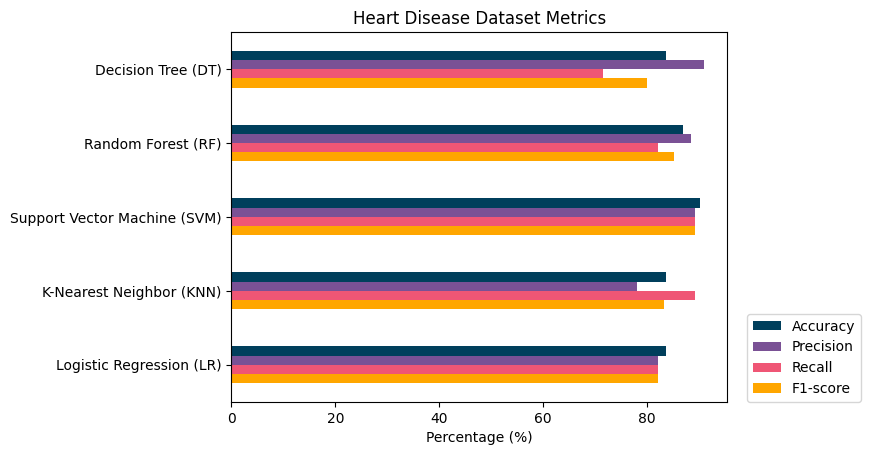

In [310]:
accuracy_Cdataset = [83.61, 83.61, 90.16, 86.89, 83.61]
precision_Cdataset = [82.14, 78.13, 89.29, 88.46, 90.91]
recall_Cdataset = [82.14, 89.29, 89.29, 82.14, 71.43]
f1score_Cdataset = [82.14, 83.33, 89.29, 85.19, 80]
legends_Cdataset = {
    'F1-score' : f1score_Cdataset,
    'Recall' : recall_Cdataset,
    'Precision' : precision_Cdataset,
    'Accuracy' : accuracy_Cdataset
}

graphdf_Cdataset = pd.DataFrame(legends_Cdataset, index=models)
graph_Cdataset = graphdf_Cdataset.plot(kind='barh', color=legendColors)
plt.legend(reverse=True, loc=(1.04, 0))
plt.title('Heart Disease Dataset Metrics')
plt.xlabel('Percentage (%)')

plt.show()

Creating graph for Statlog Heart Disease dataset

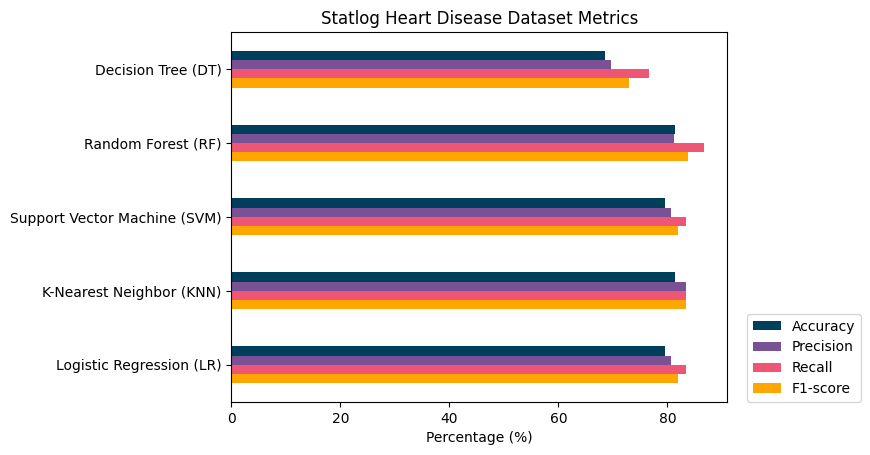

In [308]:
accuracy_Sdataset = [79.63, 81.48, 79.63, 81.48, 68.52]
precision_Sdataset = [80.65, 83.33, 80.65, 81.25, 69.70]
recall_Sdataset = [83.33, 83.33, 83.33, 86.67, 76.67]
f1score_Sdataset = [81.97, 83.33, 81.97, 83.87, 73.02]
legends_Sdataset = {
    'F1-score' : f1score_Sdataset,
    'Recall' : recall_Sdataset,
    'Precision' : precision_Sdataset,
    'Accuracy' : accuracy_Sdataset
}


graphdf_Sdataset = pd.DataFrame(legends_Sdataset, index=models)
graph_Sdataset = graphdf_Sdataset.plot(kind='barh', color=legendColors)
plt.legend(reverse=True, loc=(1.04, 0))
plt.title('Statlog Heart Disease Dataset Metrics')
plt.xlabel('Percentage (%)')

plt.show()

Creating graph for Framingham Heart Disease dataset

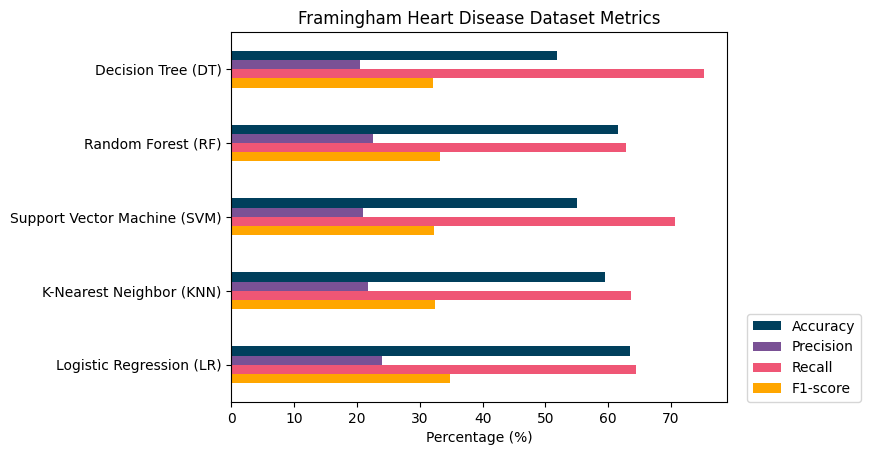

In [309]:
accuracy_Fdataset = [63.44, 59.55, 54.95, 61.56, 51.77]
precision_Fdataset = [23.92, 21.69, 20.92, 22.56, 20.46]
recall_Fdataset = [64.34, 63.57, 70.54, 62.79, 75.19]
f1score_Fdataset = [34.87, 32.35, 32.27, 33.20, 32.17]
legends_Fdataset = {
    'F1-score' : f1score_Fdataset,
    'Recall' : recall_Fdataset,
    'Precision' : precision_Fdataset,
    'Accuracy' : accuracy_Fdataset
}


graphdf_Fdataset = pd.DataFrame(legends_Fdataset, index=models)
graph_Fdataset = graphdf_Fdataset.plot(kind='barh', color=legendColors)
plt.legend(reverse=True, loc=(1.04, 0))
plt.title('Framingham Heart Disease Dataset Metrics')
plt.xlabel('Percentage (%)')

plt.show()